In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [24]:
image = cv2.imread("../images/majestic-lion-roaring-stockcake.jpg", cv2.IMREAD_GRAYSCALE)


# Sobel edge detector

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Laplacian

laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Canny
canny_edges = cv2.Canny(image, 200,220)



Empirical Trial:

Start with:

Low threshold: 50–100

High threshold: 150–200

Increase both if the edges are too noisy (detecting too much), or decrease if too little is detected.

But in above case there was much noise in this method so we set to 200, 220


In [25]:
median = np.median(image)
lower = int(max(0, 0.66 * median))
upper = int(min(255, 1.33 * median))
lower,upper

(32, 65)

The line of code laplacian_abs = cv2.convertScaleAbs(laplacian) in OpenCV is used to convert the output of the Laplacian operator into a displayable 8-bit image.

In [ ]:
# ksize=This is the aperture size for the Sobel/Laplacian kernel, and must be odd (1, 3, 5, 7...).
# ✅ Guidelines:
# ksize = 1:

# Applies a simple difference (e.g., for binary or noisy images).

# ksize = 3 (default choice):

# Balanced detection for most images.

# ksize = 5 or 7:

# Smoother gradients — good for high-resolution images or when reducing noise.

# But it can blur fine edges.



In [26]:
laplacian

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  4.,  4.],
       [ 0.,  0.,  0., ..., -4., -4., -4.],
       ...,
       [ 8., -4.,  4., ...,  0., -4.,  4.],
       [ 8., -4.,  4., ..., -4., -4.,  0.],
       [ 8., -4.,  4., ...,  4.,  4.,  8.]], shape=(512, 512))

In [27]:
laplacian_abs

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4],
       ...,
       [8, 4, 4, ..., 0, 4, 4],
       [8, 4, 4, ..., 4, 4, 0],
       [8, 4, 4, ..., 4, 4, 8]], shape=(512, 512), dtype=uint8)

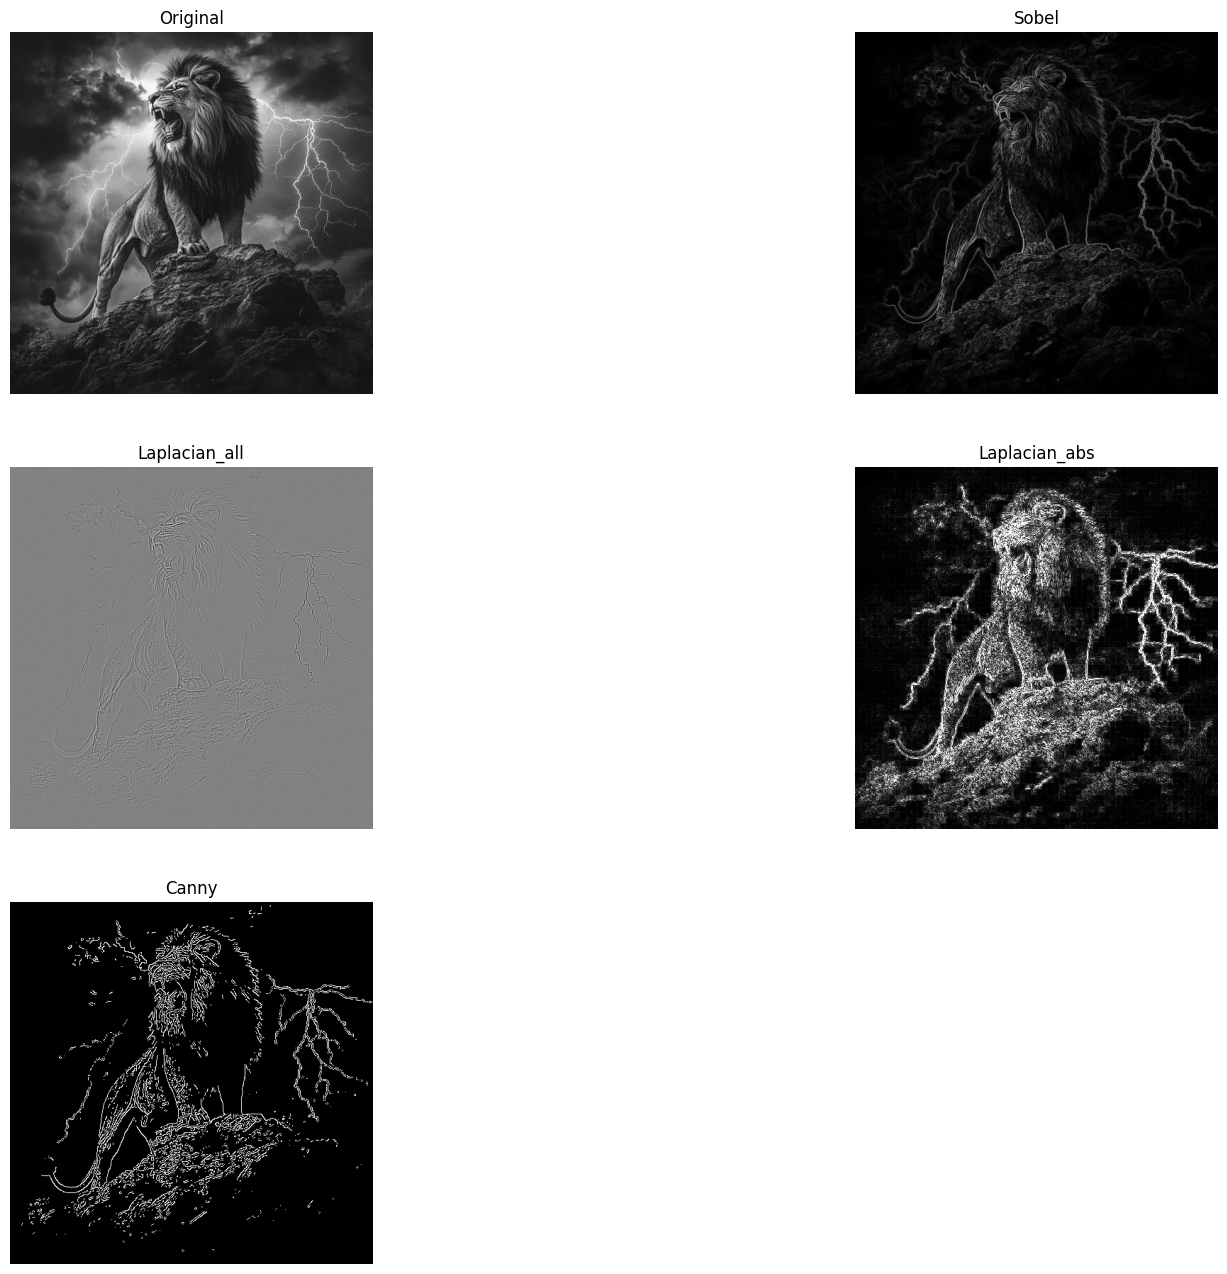

In [28]:
titles = ['Original', 'Sobel', 'Laplacian_all', 'Laplacian_abs', 'Canny']
image_list = [image, sobel_combined, laplacian, laplacian_abs,  canny_edges]

plt.figure(figsize=(20,16))
for i in range(len(titles)):
    plt.subplot(3,2, i+1)
    plt.imshow(image_list[i], cmap='grey')
    plt.title(titles[i])
    plt.axis('off')
plt.show()